## 3-1 Accuracy(정확도)  
이진분류일 경우에는 성능지표로 정확도를 잘 쓰지 않음 정확도는 숫자놀음이 될 수 있음  
특히, 테스트 레이블데이터의 값들이 불균형할 경우에는 더욱 문제가 있음.  
아래 2개의 예제로 이진분류일 경우 정확도가 얼마나 황당한 지표가 될 수 있는지 보여줌  
(말도 안되는 Classifier를 만들어도 정확도가 높게 나옴...이진분류에서는 정확도는 몹쓸 지표라는 걸 알 수 있음)

**-문제가 되는 1번 예제_타이타닉**  
타이타닉생존자 예측시, '여성이면 생존이고 남성이면 사망'으로 예측하는 너무나 간단한 Classifier를 만들어서 정확도를 확인해보기 

In [1]:
import numpy as np
from sklearn.base import BaseEstimator

class MyDummyClassifier(BaseEstimator): #BaseEstimator를 상속을 받는다는 것 (즉, BaseEstimator는 부모클래스)
    # fit( ) 메소드는 아무것도 학습하지 않음. 
    def fit(self, X , y=None):
        pass
    
    # predict( ) 메소드는 단순히 Sex feature가 1 이면 0 , 그렇지 않으면 1 로 예측함. 
    def predict(self, X):
        pred = np.zeros( ( X.shape[0], 1 )) # 초기화하는 것(pred 값을 입력받은 테스트 피처데이터의 row수 만큼 0으로 만들어 버림, 그리고 꼭 2차원으로 안만들어도 됨 (1 생략해도 됨)
        for i in range (X.shape[0]) : # row수 만큼 for loop를 돌겠다는 의미 
            if X['Sex'].iloc[i] == 1: # 남성인 경우
                pred[i] = 0
            else : # 여성인 경우
                pred[i] = 1
        
        return pred


In [2]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# Null 처리 함수
def fillna(df):
    df['Age'].fillna(df['Age'].mean(),inplace=True)
    df['Cabin'].fillna('N',inplace=True)
    df['Embarked'].fillna('N',inplace=True)
    df['Fare'].fillna(0,inplace=True)
    return df

# 머신러닝 알고리즘에 불필요한 속성 제거
def drop_features(df):
    df.drop(['PassengerId','Name','Ticket'],axis=1,inplace=True)
    return df

# 레이블 인코딩 수행. 
def format_features(df):
    df['Cabin'] = df['Cabin'].str[:1]
    features = ['Cabin','Sex','Embarked']
    for feature in features:
        le = LabelEncoder()
        le = le.fit(df[feature])
        df[feature] = le.transform(df[feature])
    return df

# 앞에서 설정한 Data Preprocessing 함수 3개 호출
def transform_features(df):
    df = fillna(df)
    df = drop_features(df)
    df = format_features(df)
    return df

In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# 원본 데이터를 재로딩, 데이터 가공, 학습데이터/테스트 데이터 분할. 
titanic_df = pd.read_csv('./titanic_train.csv') # 데이터 로딩
y_titanic_df = titanic_df['Survived'] # 타겟값(레이블값)
X_titanic_df= titanic_df.drop('Survived', axis=1) #속성값(피처값)
X_titanic_df = transform_features(X_titanic_df) # 데이터 preprocessiing 함수처리
X_train, X_test, y_train, y_test=train_test_split(X_titanic_df, y_titanic_df, \
                                                  test_size=0.2, random_state=0) #학습-테스트 데이터 분리

# 위에서 생성한 Dummy Classifier를 이용하여 학습/예측/평가 수행. 
myclf = MyDummyClassifier() # 만든 Classifier를 생성   
myclf.fit(X_train ,y_train)

mypredictions = myclf.predict(X_test)
print('Dummy Classifier의 정확도는: {0:.4f}'.format(accuracy_score(y_test , mypredictions)))

Dummy Classifier의 정확도는: 0.7877


**-문제가 되는 2번 예제_MNIST**  
1. MNIST 데이터(0~9까지의 숫자가 픽셀 수치 데이터로 되어 있음)의 레이블 값들을 7빼고(7은 1값(True)으로 만들고), 나머지 모두 0값(False)으로 만들어서 불균형하게 만들어 놓고 (레이블값분포: 1값 - 10% / 0값 - 90%인 불균형한 레이블데이터)  
2. 이 데이터를 가지고,  '무조건 0값으로으로 예측'하는 황당한 Classifier를 만들어서 정확도 확인해보기

In [4]:
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.base import BaseEstimator
from sklearn.metrics import accuracy_score
import numpy as np
import pandas as pd

class MyFakeClassifier(BaseEstimator):
    def fit(self,X,y): # fit은 실제로 아무것도 안함(아무학습하지 않음)
        pass
    
    # 입력값으로 들어오는 X 데이터 셋의 크기만큼 모두 0값으로 만들어서 반환
    # (즉, 테스트 피처데이터를 받으면 모두 0으로 예측하겠다는 것)
    def predict(self,X):
        return np.zeros( (len(X), 1) , dtype=bool) # bool로 저장하면 보이는건 False이지만 실제 값 저장은 0 이 됨
    
# 사이킷런의 내장 데이터 셋인 load_digits( )를 이용하여 MNIST 데이터 로딩
digits = load_digits()

print(digits.data)
print("### digits.data.shape:", digits.data.shape)
print(digits.target)
print("### digits.target.shape:", digits.target.shape)

[[ 0.  0.  5. ...  0.  0.  0.]
 [ 0.  0.  0. ... 10.  0.  0.]
 [ 0.  0.  0. ... 16.  9.  0.]
 ...
 [ 0.  0.  1. ...  6.  0.  0.]
 [ 0.  0.  2. ... 12.  0.  0.]
 [ 0.  0. 10. ... 12.  1.  0.]]
### digits.data.shape: (1797, 64)
[0 1 2 ... 8 9 8]
### digits.target.shape: (1797,)


In [5]:
digits.target == 7 #True, False로 나오는 ndarray

array([False, False, False, ..., False, False, False])

In [6]:
# digits번호가 7번이면 True이고 이를 astype(int)로 1로 변환(7번이 아니면 False이고 0으로 변환) 
y = (digits.target == 7).astype(int) # 90%가 0이 되고 10%가 1이 됨(불균형한 레이블값이 되었음)
X_train, X_test, y_train, y_test = train_test_split( digits.data, y, random_state=11) # test_size=0.25 가 디폴트값

In [7]:
# 불균형한 레이블 데이터 분포도 확인. 
print('레이블 테스트 세트 크기 :', y_test.shape) # 전체데이터에서 25% 정도 들었을 것임(1797*0.25)
print('테스트 세트 레이블 0 과 1의 분포도')
print(pd.Series(y_test).value_counts()) # value_counts()가 Series에서 작동하므로 Series형태로 만들어줌 

# Dummy Classifier로 학습/예측/정확도 평가
fakeclf = MyFakeClassifier()
fakeclf.fit(X_train , y_train)
fakepred = fakeclf.predict(X_test)
print('모든 예측을 0으로 하여도 정확도는:{:.3f}'.format(accuracy_score(y_test , fakepred)))

레이블 테스트 세트 크기 : (450,)
테스트 세트 레이블 0 과 1의 분포도
0    405
1     45
dtype: int64
모든 예측을 0으로 하여도 정확도는:0.900


## Confusion Matrix

In [8]:
from sklearn.metrics import confusion_matrix

# 앞절의 예측 결과인 fakepred와 실제 결과인 y_test의 Confusion Matrix출력
confusion_matrix(y_test , fakepred)

array([[405,   0],
       [ 45,   0]], dtype=int64)

## 3-2 정밀도(Precision) 과 3-3 재현율(Recall)

**MyFakeClassifier의 예측 결과로 정밀도와 재현율 측정**

In [9]:
from sklearn.metrics import accuracy_score, precision_score , recall_score

print("정밀도:", precision_score(y_test, fakepred))
print("재현율:", recall_score(y_test, fakepred))

정밀도: 0.0
재현율: 0.0


C:\anaconda\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


**오차행렬, 정확도, 정밀도, 재현율을 한꺼번에 계산하는 함수 생성 get_clf_eval()**

In [10]:
from sklearn.metrics import accuracy_score, precision_score , recall_score , confusion_matrix

def get_clf_eval(y_test , pred):
    confusion = confusion_matrix( y_test, pred)
    accuracy = accuracy_score(y_test , pred)
    precision = precision_score(y_test , pred)
    recall = recall_score(y_test , pred)
    print('오차 행렬')
    print(confusion)
    print('정확도: {0:.4f}, 정밀도: {1:.4f}, 재현율: {2:.4f}'.format(accuracy , precision ,recall))

In [11]:
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LogisticRegression

# 원본 데이터를 재로딩, 데이터 가공, 학습데이터/테스트 데이터 분할. 
titanic_df = pd.read_csv('./titanic_train.csv')
y_titanic_df = titanic_df['Survived']
X_titanic_df= titanic_df.drop('Survived', axis=1)
X_titanic_df = transform_features(X_titanic_df)

X_train, X_test, y_train, y_test = train_test_split(X_titanic_df, y_titanic_df, \
                                                    test_size=0.20, random_state=11)

lr_clf = LogisticRegression()

lr_clf.fit(X_train , y_train)
pred = lr_clf.predict(X_test)
get_clf_eval(y_test , pred)

오차 행렬
[[104  14]
 [ 13  48]]
정확도: 0.8492, 정밀도: 0.7742, 재현율: 0.7869


C:\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


### Precision/Recall Trade-off  
정밀도와 재현율은 상호 보완적인 평가 지표이기 때문에 어느 한쪽을 강제로 높이면 다른 하나의 수치는 떨어지기 쉽습니다. 이를 정밀도/재현율의 트레이드오프(Precision/Recall Trade-off)라고 부릅니다.

**predict_proba( ) 메소드 확인**  
'이진분류' 일때, predict() 는 예측값 0(Negative)과 1(Positive) 중 하나를 반환(각 row마다) /  
predict_proba()는 예측값 0의 확률과 1의 확률을 모두 반환(각 row마다)

In [12]:
pred_proba = lr_clf.predict_proba(X_test)
pred  = lr_clf.predict(X_test)
print('pred_proba()결과 Shape : {0}'.format(pred_proba.shape))
print('pred_proba array에서 앞 3개만 샘플로 추출 \n:', pred_proba[:3]) # 3개의 행이 나오는데, 각 행의 첫번째 값이 0의 확률, 두 번째 값이 1의 확률

# 예측 확률 array 와 예측 결과값 array 를 concatenate 하여 예측 확률과 결과값을 한눈에 확인
pred_proba_result = np.concatenate([pred_proba , pred.reshape(-1,1)],axis=1) # pred는 1차원이라 2차원으로 reshape해주고, axis=1 해줘서 칼럼방향으로 두 array를 붙이기 
print('두개의 class 중에서 더 큰 확률을 클래스 값으로 예측 \n',pred_proba_result[:3]) 


pred_proba()결과 Shape : (179, 2)
pred_proba array에서 앞 3개만 샘플로 추출 
: [[0.46173353 0.53826647]
 [0.87868533 0.12131467]
 [0.87720609 0.12279391]]
두개의 class 중에서 더 큰 확률을 클래스 값으로 예측 
 [[0.46173353 0.53826647 1.        ]
 [0.87868533 0.12131467 0.        ]
 [0.87720609 0.12279391 0.        ]]


**Binarizer 활용**

In [13]:
from sklearn.preprocessing import Binarizer

X = [[ 1, -1,  2],
     [ 2,  0,  0],
     [ 0,  1.1, 1.2]]

# threshold 기준값보다 크면 1을, 같거나 작으면 0을 반환
binarizer = Binarizer(threshold=1.1)                     
print(binarizer.fit_transform(X)) # Binarizer의 fit_transform() 함수 사용 (데이터 받아서 변환시켜줌)

[[0. 0. 1.]
 [1. 0. 0.]
 [0. 0. 1.]]


**분류 결정 임계값 0.5 기반에서 Binarizer를 이용하여 예측값 변환**

In [22]:
from sklearn.preprocessing import Binarizer

#Binarizer의 threshold 설정값. 분류 결정 임곗값임.  
custom_threshold = 0.5

# predict_proba( ) 반환값의 두번째 컬럼 , 즉 Positive 확률(1의 확률)만 추출하여 Binarizer를 적용
# (threshold는 positive(1)일 확률에서만 생각해주면 됨. positive(1) 확률에서 임계값으로 판단하므로) 
pred_proba_1 = pred_proba[:,1].reshape(-1,1) # Binarizer에 들어가는 값은 2차원이어야 해서 reshape를 해준 것 

#위의 셀 코드에서는 fit_transform으로 호출했지만 여기서는 따로 호출(결과는 똑같음. 상관없음)
binarizer = Binarizer(threshold=custom_threshold).fit(pred_proba_1) 
custom_predict = binarizer.transform(pred_proba_1)

get_clf_eval(y_test, custom_predict)

오차 행렬
[[104  14]
 [ 13  48]]
정확도: 0.8492, 정밀도: 0.7742, 재현율: 0.7869


**분류 결정 임계값 0.4 기반에서 Binarizer를 이용하여 예측값 변환**

In [23]:
# Binarizer의 threshold 설정값을 0.4로 설정. 즉 분류 결정 임곗값을 0.5에서 0.4로 낮춤  
custom_threshold = 0.4
pred_proba_1 = pred_proba[:,1].reshape(-1,1)
binarizer = Binarizer(threshold=custom_threshold).fit(pred_proba_1) 
custom_predict = binarizer.transform(pred_proba_1)

get_clf_eval(y_test , custom_predict)

오차 행렬
[[99 19]
 [10 51]]
정확도: 0.8380, 정밀도: 0.7286, 재현율: 0.8361


**여러 개의 분류 결정 임곗값을 변경하면서  Binarizer를 이용하여 예측값 변환**

In [24]:
# 테스트를 수행할 모든 임곗값을 리스트 객체로 저장. 
thresholds = [0.4, 0.45, 0.50, 0.55, 0.60]

def get_eval_by_threshold(y_test , pred_proba_c1, thresholds):
    # thresholds list객체내의 값을 차례로 iteration하면서 Evaluation 수행.
    for custom_threshold in thresholds:
        binarizer = Binarizer(threshold=custom_threshold).fit(pred_proba_c1) 
        custom_predict = binarizer.transform(pred_proba_c1)
        print('임곗값:',custom_threshold)
        get_clf_eval(y_test , custom_predict)

get_eval_by_threshold(y_test ,pred_proba[:,1].reshape(-1,1), thresholds )

임곗값: 0.4
오차 행렬
[[99 19]
 [10 51]]
정확도: 0.8380, 정밀도: 0.7286, 재현율: 0.8361
임곗값: 0.45
오차 행렬
[[103  15]
 [ 12  49]]
정확도: 0.8492, 정밀도: 0.7656, 재현율: 0.8033
임곗값: 0.5
오차 행렬
[[104  14]
 [ 13  48]]
정확도: 0.8492, 정밀도: 0.7742, 재현율: 0.7869
임곗값: 0.55
오차 행렬
[[109   9]
 [ 15  46]]
정확도: 0.8659, 정밀도: 0.8364, 재현율: 0.7541
임곗값: 0.6
오차 행렬
[[112   6]
 [ 16  45]]
정확도: 0.8771, 정밀도: 0.8824, 재현율: 0.7377


**precision_recall_curve( ) 를 이용하여 임곗값에 따른 정밀도-재현율 값 추출**

In [25]:
from sklearn.metrics import precision_recall_curve

# 레이블 값이 1일때의 예측 확률을 추출 
pred_proba_class1 = lr_clf.predict_proba(X_test)[:, 1] 

# 실제값(테스트 레이블데이터)과 레이블 값이 1일 때의 예측 확률을 precision_recall_curve 인자로 입력하면, 
# 여러개의 분류 임계값들의 array와  거기에 따른(매핑되는) 정밀도, 재현율값들의 array를 반환해줌 
precisions, recalls, thresholds = precision_recall_curve(y_test, pred_proba_class1 )
print('반환된 분류 결정 임곗값 배열의 Shape:', thresholds.shape)
print('반환된 precisions 배열의 Shape:', precisions.shape)
print('반환된 recalls 배열의 Shape:', recalls.shape)

print("thresholds 5 sample:", thresholds[:5])
print("precisions 5 sample:", precisions[:5])
print("recalls 5 sample:", recalls[:5])

#반환된 임계값 배열 로우가 143건이므로 샘플로 10건만 추출하되, 임곗값을 15 Step으로 추출.(143건에서 15간격으로 1개씩 뽑으면 10개 뽑아짐)
thr_index = np.arange(0, thresholds.shape[0], 15) #arange(10)->[0 1 2 3 ...  9]/ arrange(start=0, stop=10, step=2)-> [0 2 4 6 8] / arange(0, 100, 15)->[0 15 30 45 60 75 90]
print('샘플 추출을 위한 임계값 배열의 index 10개:', thr_index)
print('샘플용 10개의 임곗값: ', np.round(thresholds[thr_index], 2))

# 15 step 단위로 추출된 임계값에 따른 정밀도와 재현율 값 
print('샘플 임계값별 정밀도: ', np.round(precisions[thr_index], 3))
print('샘플 임계값별 재현율: ', np.round(recalls[thr_index], 3))

반환된 분류 결정 임곗값 배열의 Shape: (143,)
반환된 precisions 배열의 Shape: (144,)
반환된 recalls 배열의 Shape: (144,)
thresholds 5 sample: [0.10390401 0.10390623 0.10393116 0.1077379  0.10887885]
precisions 5 sample: [0.38853503 0.38461538 0.38709677 0.38961039 0.38562092]
recalls 5 sample: [1.         0.98360656 0.98360656 0.98360656 0.96721311]
샘플 추출을 위한 임계값 배열의 index 10개: [  0  15  30  45  60  75  90 105 120 135]
샘플용 10개의 임곗값:  [0.1  0.12 0.14 0.19 0.28 0.4  0.56 0.67 0.82 0.95]
샘플 임계값별 정밀도:  [0.389 0.44  0.466 0.539 0.647 0.729 0.836 0.949 0.958 1.   ]
샘플 임계값별 재현율:  [1.    0.967 0.902 0.902 0.902 0.836 0.754 0.607 0.377 0.148]


**임곗값의 변경에 따른 정밀도-재현율 변화 곡선을 그림(matplotlib.pyplot 사용)**

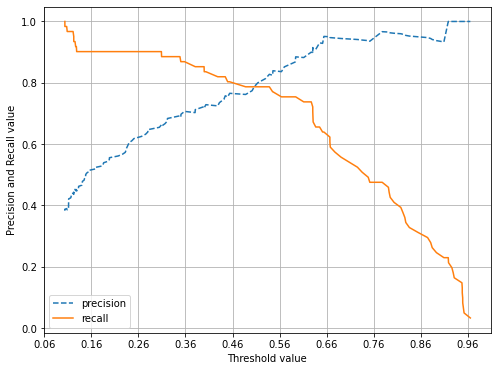

In [29]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker # 질문) 코드 19번줄 xticks 함수 쓰려고??
%matplotlib inline

def precision_recall_curve_plot(y_test , pred_proba_c1):
    # threshold ndarray와 이 threshold에 따른 정밀도, 재현율 ndarray 추출. 
    precisions, recalls, thresholds = precision_recall_curve( y_test, pred_proba_c1)
    
    # X축을 threshold값으로, Y축은 정밀도, 재현율 값으로 각각 Plot 수행. 정밀도는 점선으로 표시
    plt.figure(figsize=(8,6)) # 그래프 사이즈 조정
    threshold_boundary = thresholds.shape[0] 
    plt.plot(thresholds, precisions[0:threshold_boundary], linestyle='--', label='precision')
    plt.plot(thresholds, recalls[0:threshold_boundary],label='recall')
    # plt에서 x축값, y축값 넣는건데 y축값 슬라이싱해준거는 위의 코드에서 확인했을 때, y축들인 precisions과 recalls의 수가 144개였고,
    # x축인 thresholds 수는 143개 였으므로, x축과 y축의 수를 맞춰줘야 하므로 y축값들에서 슬라이싱 사용
    
    # threshold 값 X 축의 Scale을 0.1 단위로 변경
    start, end = plt.xlim() #x축의 처음과 끝값을 반환 
    plt.xticks(np.round(np.arange(start, end, 0.1),2)) #X축 값들 표시 간격 설정(X 축의 Scale을 0.1 단위로 변경)
    
    # x축, y축 label과 legend, 그리고 grid 설정
    plt.xlabel('Threshold value'); plt.ylabel('Precision and Recall value')
    plt.legend() #범례
    plt.grid() # 눈금선(안하면, 그냥 그래프 바탕이 눈금선 없어지고 하얀바탕)
    plt.show() # 그래프 그려주는 코드 
    
precision_recall_curve_plot( y_test, lr_clf.predict_proba(X_test)[:, 1] )


### 3-4 F1 Score  
-추가설명) F1 Score가 정밀도와 재현율에서 어느 한쪽으로 치우치지 않을 때 좋은 지표라는 의미는 어느 한쪽이 크게 나쁜 수치가 나오지 않아야 한다는 의미로 해석해주셨으면 합니다.  양쪽 수치 모두 낮은 수치라면 어느 한쪽으로 치우치지는 않았지만 F1 Score가 높게 나오기는 어렵습니다.  
f1 score 공식을 보시면 한쪽이 작아지면 값이 크게 작아집니다. 때문에 재현율, 정밀도가 크게 차이 나지 않으면 좋습니다. 더불어 재현율, 정밀도 수치 자체가 어느정도 크기를 가지는가도 F1 Score 성능을 좌우 합니다.  둘다 0.5, 0.5 라면 한쪽으로 치우치지 않더라도 F1 Score는 0.6, 0.5 보다 낮습니다.  
양 지표의 차이, 그리고 개별 지표의 수치값 모두 F1 Score에 영향을 미친다고 생각해주시면 좋을 것 같습니다.  

In [33]:
from sklearn.metrics import f1_score 
f1 = f1_score(y_test , pred)
print('F1 스코어: {0:.4f}'.format(f1))


F1 스코어: 0.7805


In [53]:
def get_clf_eval(y_test , pred):
    confusion = confusion_matrix( y_test, pred)
    accuracy = accuracy_score(y_test , pred)
    precision = precision_score(y_test , pred)
    recall = recall_score(y_test , pred)
    # F1 스코어 추가
    f1 = f1_score(y_test,pred)
    print('오차 행렬')
    print(confusion)
    # f1 score print 추가
    print('정확도: {0:.4f}, 정밀도: {1:.4f}, 재현율: {2:.4f}, F1:{3:.4f}'.format(accuracy, precision, recall, f1))

thresholds = [0.4 , 0.45 , 0.50 , 0.55 , 0.60]
pred_proba = lr_clf.predict_proba(X_test)
get_eval_by_threshold(y_test, pred_proba[:,1].reshape(-1,1), thresholds)


임곗값: 0.4
오차 행렬
[[97 21]
 [11 50]]
정확도: 0.8212, 정밀도: 0.7042, 재현율: 0.8197, F1:0.7576
임곗값: 0.45
오차 행렬
[[105  13]
 [ 13  48]]
정확도: 0.8547, 정밀도: 0.7869, 재현율: 0.7869, F1:0.7869
임곗값: 0.5
오차 행렬
[[108  10]
 [ 14  47]]
정확도: 0.8659, 정밀도: 0.8246, 재현율: 0.7705, F1:0.7966
임곗값: 0.55
오차 행렬
[[111   7]
 [ 16  45]]
정확도: 0.8715, 정밀도: 0.8654, 재현율: 0.7377, F1:0.7965
임곗값: 0.6
오차 행렬
[[113   5]
 [ 17  44]]
정확도: 0.8771, 정밀도: 0.8980, 재현율: 0.7213, F1:0.8000


## 3-5 ROC Curve와 AUC(roc_auc_score)

In [38]:
from sklearn.metrics import roc_curve

# 레이블 값이 1일때의 예측 확률을 추출 
pred_proba_class1 = lr_clf.predict_proba(X_test)[:, 1] 

# precision_recall_curve()와 비슷하게, 
# 실제값 데이터(테스트 레이블값 데이터)셋과 레이블 값이 positive(1)일 때의 예측 확률을 roc_curve 인자로 입력하면, 
# 여러 개의 분류 임계값들의 array와  거기에 따른(매핑되는) fps값들, tprs(재현율)값들의 array를 반환해줌 
fprs , tprs , thresholds = roc_curve(y_test, pred_proba_class1)

# 반환된 임곗값 배열 로우가 55건이므로 샘플로 10건만 추출하되, 임곗값을 6 Step으로 추출. 
thr_index = np.arange(0, thresholds.shape[0], 6)
print('샘플 추출을 위한 임곗값 배열의 index 10개:', thr_index)
print('샘플용 10개의 임곗값: ', np.round(thresholds[thr_index], 2))

# 5 step 단위로 추출된 임계값에 따른 FPR, TPR 값
print('샘플 임곗값별 FPR: ', np.round(fprs[thr_index], 3))
print('샘플 임곗값별 TPR: ', np.round(tprs[thr_index], 3))


샘플 추출을 위한 임곗값 배열의 index 10개: [ 0  6 12 18 24 30 36 42 48 54]
샘플용 10개의 임곗값:  [1.97 0.65 0.63 0.55 0.43 0.35 0.15 0.12 0.11 0.01]
샘플 임곗값별 FPR:  [0.    0.017 0.042 0.085 0.161 0.203 0.466 0.61  0.754 1.   ]
샘플 임곗값별 TPR:  [0.    0.639 0.705 0.77  0.82  0.869 0.902 0.934 0.967 1.   ]


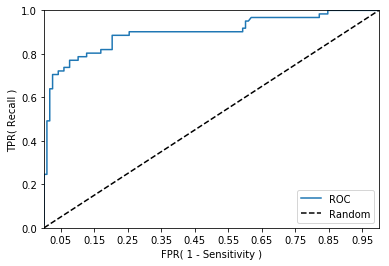

In [55]:
def roc_curve_plot(y_test , pred_proba_c1):
    # 임곗값에 따른 FPR, TPR 값을 반환 받음. 
    fprs , tprs , thresholds = roc_curve(y_test ,pred_proba_c1)

    # ROC Curve를 plot 곡선으로 그림. 
    plt.plot(fprs , tprs, label='ROC')
    # 가운데 대각선 직선을 그림. 
    plt.plot([0, 1], [0, 1], 'k--', label='Random')
    
    # FPR X 축의 Scale을 0.1 단위로 변경, X,Y 축명 설정등   
    start, end = plt.xlim()
    plt.xticks(np.round(np.arange(start, end, 0.1),2))
    plt.xlim(0,1); plt.ylim(0,1)
    plt.xlabel('FPR( 1 - Sensitivity )'); plt.ylabel('TPR( Recall )')
    plt.legend()
    plt.show()
    
roc_curve_plot(y_test, lr_clf.predict_proba(X_test)[:, 1] )


In [56]:
from sklearn.metrics import roc_auc_score

### 아래는 roc_auc_score()의 인자를 잘못 입력한 것으로, 책에서 수정이 필요한 부분입니다. 
### 책에서는 roc_auc_score(y_test, pred)에서 pred-예측 타겟값을 입력하였으나,
### roc_auc_score(y_test, y_score)로 y_score는 predict_proba()로 호출된 예측 확률 ndarray중 Positive 열에 해당하는 ndarray입니다. 

#pred = lr_clf.predict(X_test) 
#roc_score = roc_auc_score(y_test, pred) -> 이게 틀렸다는 것

pred_proba = lr_clf.predict_proba(X_test)[:, 1]
roc_score = roc_auc_score(y_test, pred_proba)
print('ROC AUC 값: {0:.4f}'.format(roc_score))


ROC AUC 값: 0.8987


In [ ]:
def get_clf_eval(y_test, pred=None, pred_proba=None): # 질문) None 하는 이유 잘 모르겠음 -(별 의미 없다고 함)
    confusion = confusion_matrix( y_test, pred)
    accuracy = accuracy_score(y_test , pred)
    precision = precision_score(y_test , pred)
    recall = recall_score(y_test , pred)
    f1 = f1_score(y_test,pred)
    # ROC-AUC 추가 
    roc_auc = roc_auc_score(y_test, pred_proba)
    print('오차 행렬')
    print(confusion)
    # ROC-AUC print 추가
    print('정확도: {0:.4f}, 정밀도: {1:.4f}, 재현율: {2:.4f},\
          F1: {3:.4f}, AUC:{4:.4f}'.format(accuracy, precision, recall, f1, roc_auc))


**-질문) pred와 pred_proba는 None으로 초기값을 주는 이유와 None으로 초기값을 주지않았을 때의 차이가 궁금합니다.**  
-답변) 특별한 의미가 있는건 아닙니다. pred와 pred_proba가 함수 인자로 들어간다는 것을 조금 강조하려다 보니 그리 적게 되었습니다. 오히려 혼돈을 드린것 같아 민망스럽습니다.